Distribution function can be easily estimated due to LLN and Glivenko Cantelli. 

On the other hand estimating density can be facilitated via Kernel density estimation.
As a motivation observe that:

$f(x) = F'(x) = \lim_{h->0}\frac{F(x+h) - F(x-h)}{2h}$.

An estimator then becomes:

$\frac{\hat{F}(x+h) - \hat{F}(x-h)}{2h} = \frac{1}{2nh}\sum_{i=1}^{n}\mathbf{1}_{\{x-h<X_i<=x+h\}}=\frac{1}{2nh}\sum_{i=1}^{n}\mathbf{1}_{\{\frac{X_i-x}{h}\in(0,1)\}}$

Finally the Kernel density estimator is obtained as follows:

$\hat{f}(x) = \hat{f}_h(x) = \frac{1}{nh}\sum_{i=1}^{n}K(\frac{X_i-x}{h}) = \int_{\mathbf{R}}K(\frac{z-x}{h})d\hat{F}_n(z)$

Where kernel K is a function that integrates to 1 (e.g. density-like) and bandwidth h > 0, small.

A typical examples of kenrel are:

Gaussian kernel: $K(u) = \frac{1}{\sqrt{2\pi}}\exp(-\frac{1}{2}u^2)$

In the following is the implementation of KDE method to estimate a density of a bimodal t distributed sample.

In [125]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

In [160]:
def K_gaussian(u):
    return 1 / (np.sqrt(2*np.pi)) * np.exp((- 0.5 * u**2))
def K_epanechnikov(u):
    return 3/4 * (1-u**2)*np.where(np.abs(u) <= 1, 1, 0)
def K_rectangular(u):
    return 1/2 * np.where(np.abs(u) <= 1, 1, 0)

As an example distribution that for which we will use Kernel estimation will be bimodal t distribution. Below is the simulation.

In [161]:
def simulate_bimodal_t(n, df1, df2, mu1, mu2, p):
    ps = np.random.uniform(0, 1, size=n)
    mix = np.where(ps<p, 1, 0)
    sample = np.where(mix, t.rvs(loc=mu1, df=df1, size=n), t.rvs(loc=mu2, df=df2, size=n))
    return sample

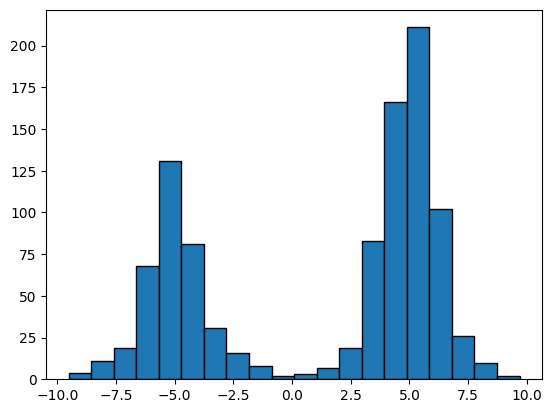

In [162]:
size = 1000
t_sample = simulate_bimodal_t(n=size, df1=4, df2=7, mu1=-5, mu2=5, p=0.4)
plt.hist(t_sample, bins=20, edgecolor='black');

Now we use Kernel density estimation with Gaussian kernel to estimate the density.

In [164]:
def KDE(x, sample, h, kernel='gaussian'):
    n = len(sample)
    if str(kernel).lower() == 'gaussian':
        K = K_gaussian
    if str(kernel).lower() == 'epanechnikov':
        K = K_epanechnikov
    if str(kernel).lower() == 'rectangular':
        K = K_rectangular
        
    summand = np.sum(K((sample-x)/h))
    f_hat_x = 1 / (n*h) * summand
    
    return f_hat_x

In [169]:
domain = np.linspace(-10, 10, 10000)
f_hat_gauss = np.array([])
f_hat_epa = np.array([])
f_hat_rectangular = np.array([])
h = 0.5
for x in domain:
    f_hat_gauss = np.append(f_hat_gauss, KDE(x, t_sample, h, 'gaussian'))
    f_hat_epa = np.append(f_hat_epa, KDE(x, t_sample, h, 'epanechnikov'))
    f_hat_rectangular = np.append(f_hat_rectangular, KDE(x, t_sample, h, 'rectangular'))

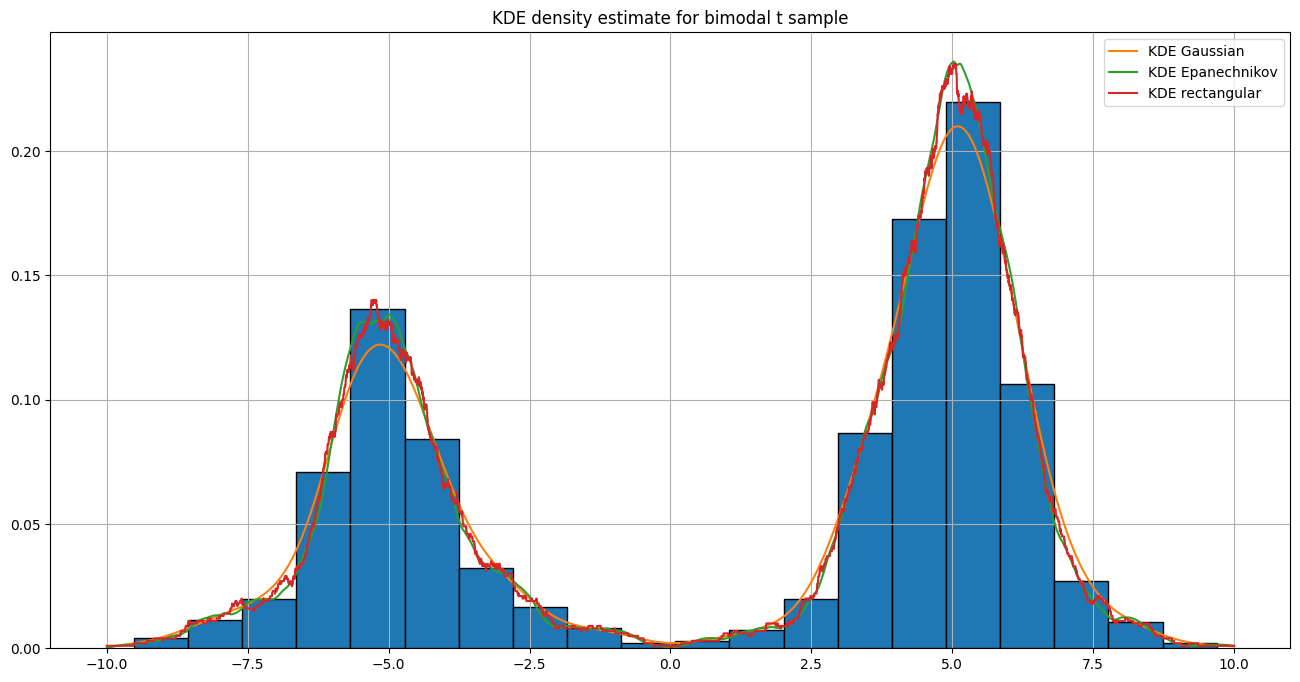

In [170]:
plt.figure(figsize=(16, 8))
plt.hist(t_sample, density=True, bins=20, edgecolor='black');
plt.plot(domain, f_hat_gauss, label='KDE Gaussian');
plt.plot(domain, f_hat_epa, label='KDE Epanechnikov');
plt.plot(domain, f_hat_rectangular, label='KDE rectangular');
plt.title("KDE density estimate for bimodal t sample")
plt.grid()
plt.legend()

It can be observed that for given bandwidth h, KDE estimator with Gaussian kernel returns the smoothest density. Thus choice of the bandwidth should depend on the choice of the kernel. In general the choice of bandwidth h is non-triviall and it leaves us with a dillema. Namely choosing h small leands to high variance of the estimator whereas choosing large h leads to larger bias of the density estimator. Still, optimal bandwidth can be found.